In [45]:
import yfinance as yf
import pandas as pd
import numpy as np

from backtest import backtest_dca

In [46]:
df_origin = pd.read_csv("prices.csv", index_col=0, parse_dates=True)
df_origin

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX,DOT,LTC
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915,4.370816,70.815659
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615,4.489374,74.862907
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450,4.524364,75.602722
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613,4.630191,75.433907
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196,4.617662,74.250809
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,89102.570312,3022.210938,897.665527,1.913935,127.054794,0.294245,0.360304,469.657715,12.035913,12.118824,1.874989,69.964523
2026-01-28,89184.570312,3006.607422,901.348877,1.908726,125.118446,0.294984,0.357879,468.625854,11.832648,12.058091,1.867865,69.383377
2026-01-29,84561.585938,2818.232666,867.098145,1.805065,117.605766,0.294531,0.334010,459.148529,11.098450,11.025457,1.732650,66.103889


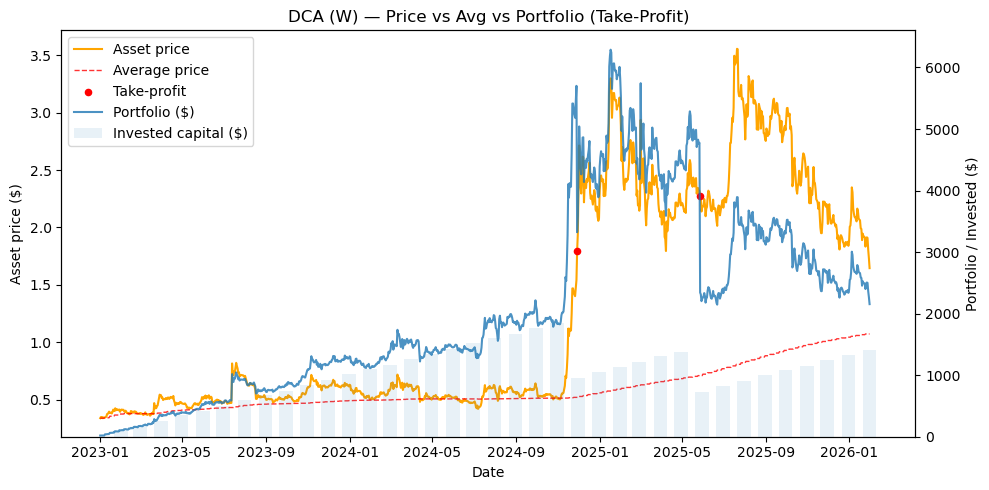

In [47]:
sol_prices = df_origin["XRP"]
invest_sum = 3000 / (52 * 3)

res, metric = backtest_dca(
    prices=sol_prices,
    buy_amount=invest_sum,
    freq="W",
    available_sum=1_000_000,
    fee=0.001,
    profit_multiple=3,
    cooldown_days=180,
    plot=True
)

In [48]:
metric

{'Cash_spent': 3096.1538461538407,
 'Final_portfolio_value': 2154.5807365911332,
 'Realized_profit': 3967.8490933002445,
 'Total_equity': 6122.429829891378,
 'Num_take_profits': 2}

In [49]:
res

,Portfolio,Invested,Avg_price,Realized_profit
2023-01-01,19.211538,19.230769,0.339102,0.000000
2023-01-02,19.766909,19.230769,0.339102,0.000000
2023-01-03,19.498552,19.230769,0.339102,0.000000
2023-01-04,19.723694,19.230769,0.339102,0.000000
2023-01-05,19.170480,19.230769,0.339102,0.000000
...,...,...,...,...
2026-01-27,2506.107628,1403.846154,1.072129,3967.849093
2026-01-28,2499.287000,1403.846154,1.072129,3967.849093
2026-01-29,2363.553298,1403.846154,1.072129,3967.849093
2026-01-30,2268.439761,1403.846154,1.072129,3967.849093


# всі монети

In [50]:
# df = df_origin[:"2025-09-01"].copy()
df = df_origin.copy()
# df = df[['ETH', 'BNB', 'SOL', 'LINK', 'LTC', 'AVAX', 'DOT']]
# df = df.loc["2025-06-01 00:00:00":]

df

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX,DOT,LTC
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915,4.370816,70.815659
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615,4.489374,74.862907
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450,4.524364,75.602722
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613,4.630191,75.433907
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196,4.617662,74.250809
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,89102.570312,3022.210938,897.665527,1.913935,127.054794,0.294245,0.360304,469.657715,12.035913,12.118824,1.874989,69.964523
2026-01-28,89184.570312,3006.607422,901.348877,1.908726,125.118446,0.294984,0.357879,468.625854,11.832648,12.058091,1.867865,69.383377
2026-01-29,84561.585938,2818.232666,867.098145,1.805065,117.605766,0.294531,0.334010,459.148529,11.098450,11.025457,1.732650,66.103889


In [51]:
res = {}
metric = {}

selected_symbols = list(df.columns)[:10]
total_investment = 30_000
individual_investment = total_investment / len(selected_symbols)

total_days = len(df)
total_days = total_days // 7

for symbol in selected_symbols:
    invest_sum = individual_investment / total_days

    prices = df[symbol]

    dca_result_one, dca_metrics_one = backtest_dca(
        prices=prices,
        buy_amount=invest_sum,
        freq="W",
        available_sum=1_000_000,
        fee=0.001,
        cooldown_days=180,
        profit_multiple=3,
        plot=False
    )

    res[symbol] = dca_metrics_one
    metric[symbol] = dca_metrics_one

In [52]:
results = pd.DataFrame(res).T

In [56]:
results.sort_values(by="Total_equity", ascending=False)

,Cash_spent,Final_portfolio_value,Realized_profit,Total_equity,Num_take_profits
TRON,3000.0,3971.820004,3244.730700,7216.550704,1.0
XMR,3000.0,3769.642016,3011.536286,6781.178301,1.0
XRP,3000.0,2087.668291,3844.623966,5932.292258,2.0
BNB,3000.0,2874.171670,2765.472572,5639.644242,1.0
SOL,3000.0,1568.726540,3319.256802,4887.983342,3.0
BTC,3000.0,4832.959286,0.000000,4832.959286,0.0
LINK,3000.0,1649.329444,1909.528427,3558.857871,1.0
ADA,3000.0,1235.151340,1921.700615,3156.851955,1.0
ETH,3000.0,3065.266706,0.000000,3065.266706,0.0
AVAX,3000.0,1185.856832,942.046342,2127.903173,1.0


In [54]:
results['Cash_spent'].sum(), results['Total_equity'].sum()

(29999.999999999924, 47199.48783774807)

In [55]:
results.index.tolist()

['BTC', 'ETH', 'BNB', 'XRP', 'SOL', 'TRON', 'ADA', 'XMR', 'LINK', 'AVAX']